<a href="https://colab.research.google.com/github/freshq99/Colab/blob/main/AutoencoderRecreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train/255

In [ ]:
X_test = X_test/255

In [ ]:
#Inizio ora la costruzione dell'autoencoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
#Costruisco il "Stacked Autoencoder", ossia strati Dense in fila

#Le immagini sono di dimensione 28*28, quindi continuo a dividere

In [ ]:
28*28

784

In [ ]:
784/2

392.0

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
#Dato che la immagine è di tipo 28*28, la rendo piatta con flatten

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation="relu"))
encoder.add(Dense(200, activation="relu"))
encoder.add(Dense(100, activation="relu"))
encoder.add(Dense(50, activation="relu"))
encoder.add(Dense(25, activation="relu"))

In [ ]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
Total params: 420,625
Trainable params: 420,625
Non-trai

In [ ]:
#Vado da 784 dimensioni a 25, circa il 3% delle features dell'immaginec

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

#con la sigmoide, perchè uso la perdita binaria categorica.
#L'output è uguale alla vera immagine ? 

In [ ]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                1300      
                                                                 
 dense_6 (Dense)             (None, 100)               5100      
                                                                 
 dense_7 (Dense)             (None, 200)               20200     
                                                                 
 dense_8 (Dense)             (None, 400)               80400     
                                                                 
 dense_9 (Dense)             (None, 784)               314384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 421,384
Trainable params: 421,384
Non-tr

In [ ]:
autoencoder = Sequential([encoder, decoder])

In [ ]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer=SGD(lr=1.5),
                    metrics=['accuracy']) #uso binaria perchè serve solo sapere se inout e output sono uguali

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
autoencoder.fit(X_train, X_train, epochs=5,
                validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2526 - accuracy: 0.0834 - val_loss: 0.2255 - val_accuracy: 0.1115
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1908 - accuracy: 0.1521 - val_loss: 0.1705 - val_accuracy: 0.1788
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1595 - accuracy: 0.1959 - val_loss: 0.1514 - val_accuracy: 0.2011
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1472 - accuracy: 0.2140 - val_loss: 0.1418 - val_accuracy: 0.2197
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1414 - accuracy: 0.2242 - val_loss: 0.1379 - val_accuracy: 0.2211


In [ ]:
#Come lo uso ?

In [ ]:
passed_images = autoencoder.predict(X_test[:10])

Original image


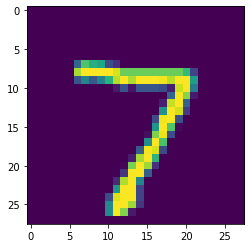

Attempted reconstruction after autoencoder


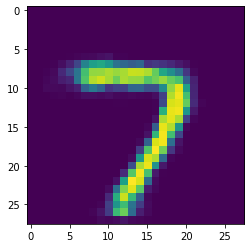

In [ ]:
n = 0

print("Original image")
plt.imshow(X_test[n])
plt.show()
print("Attempted reconstruction after autoencoder")
plt.imshow(passed_images[n])
plt.show()

#Sono passato da 784 dimensioni a 25, per poi ritornare a 784, ma l'autoencoder 
#ha fatto tutto con 25 features. 